In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
housing = pd.read_csv("housing_prices.csv")

In [9]:
housing.shape

(1460, 81)

In [13]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory Analysis

# Univariate

A Distplot or distribution plot, depicts the variation in the data distribution. 
Seaborn Distplot represents the overall distribution of continuous data variables.
We can see outliers using displot.

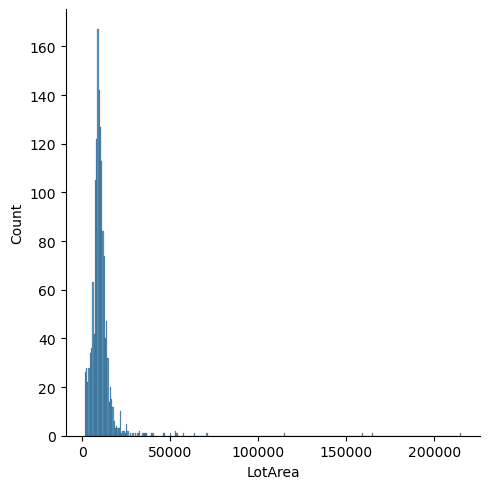

In [30]:
# Analyze the spread of the "LotArea" column
#Find the difference in using kde = false and kde = true;

sns.displot(housing["LotArea"], kde=False)

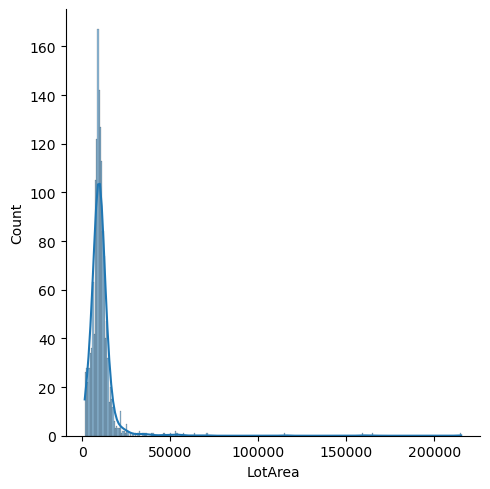

In [25]:
sns.displot(housing["LotArea"], kde=True);

Bar Chart

seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.

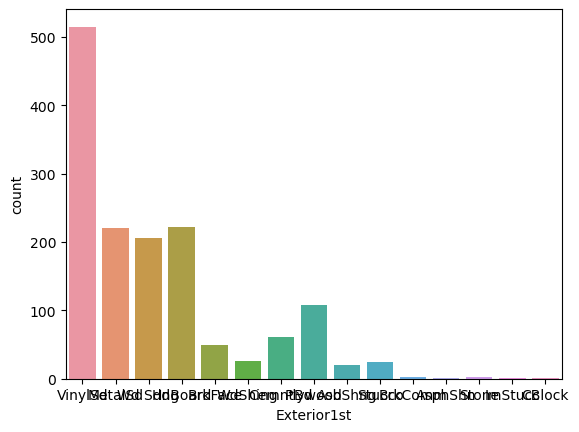

In [50]:
#Lets see what are the different types of housing exteriors

plot = sns.countplot(x = "Exterior1st", data = housing)

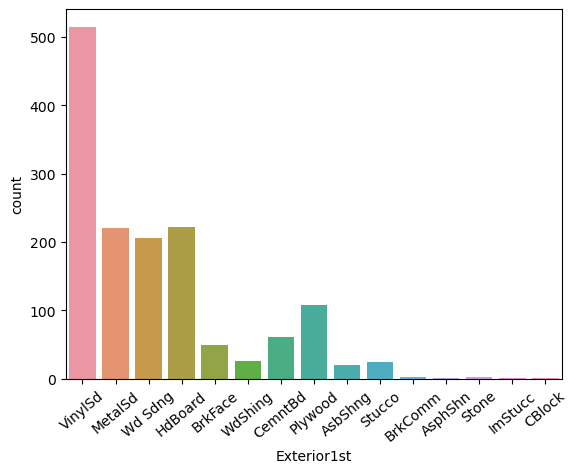

In [52]:
#What are the different types of housing exteriors

plot = sns.countplot(x = "Exterior1st", data = housing)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

#The second line is used to tilt the name of exterior so that it can be displayed properly.

# Bivariate Analysis

<b> Q: Does the price of the house depend on the lot area? </b>

<b> seaborn.regplot() This method is used to plot data and a linear regression model fit. </b>

<Axes: xlabel='LotArea', ylabel='SalePrice'>

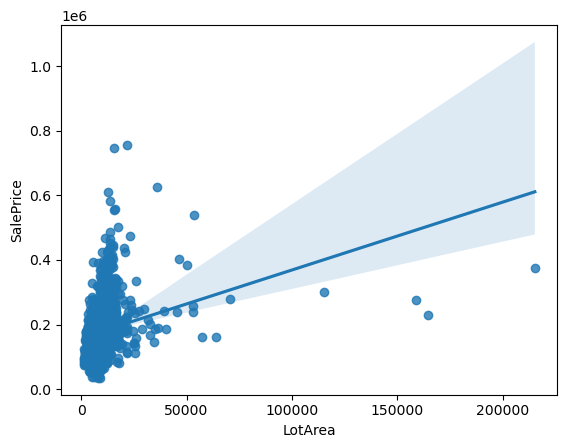

In [57]:
sns.regplot(x= "LotArea", y = "SalePrice", data = housing)

 <b> Are outliers skewing the relationship.. Redraw the relationshp after removing very large values. </b>

Pandas quantile() function returns values at the given quantile over the requested axis. 

In [71]:
#To generalize, it means to give us the 5th percentile value, 95th percentile value and 99th percentile value.

housing["LotArea"].quantile([0.5,0.95,0.99])

0.50     9478.50
0.95    17401.15
0.99    37567.64
Name: LotArea, dtype: float64

We can see there is a huge difference between the 95th and 99th percentile value. So, we should omit those outliers in some cases.

<Axes: xlabel='LotArea', ylabel='SalePrice'>

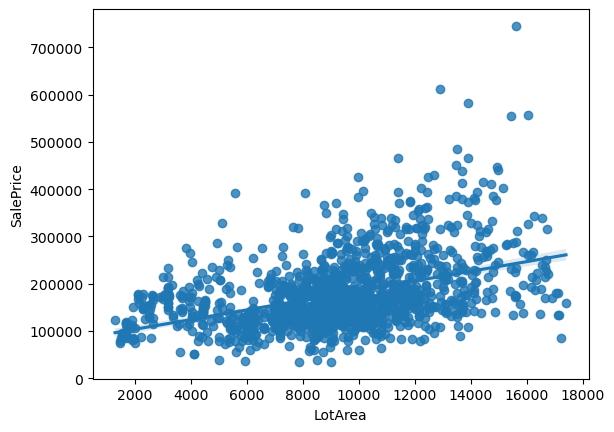

In [75]:
housing_sub = housing.loc[housing['LotArea'] < housing["LotArea"].quantile(0.95)]
sns.regplot(x= "LotArea", y = "SalePrice", data = housing_sub)

All the data after 95th percentile are removed.

### Plotting multiple graphs
<b> Q: Analyze the relationship between SalesPrice and all "Square Feet (SF)" related columns </b>

In [90]:
sf_cols = [col_name for col_name in housing.columns if "SF" in col_name]
print(len(sf_cols))
sf_cols

9


['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

<b>Preparing 9 subgraphs to show the relation.</b>

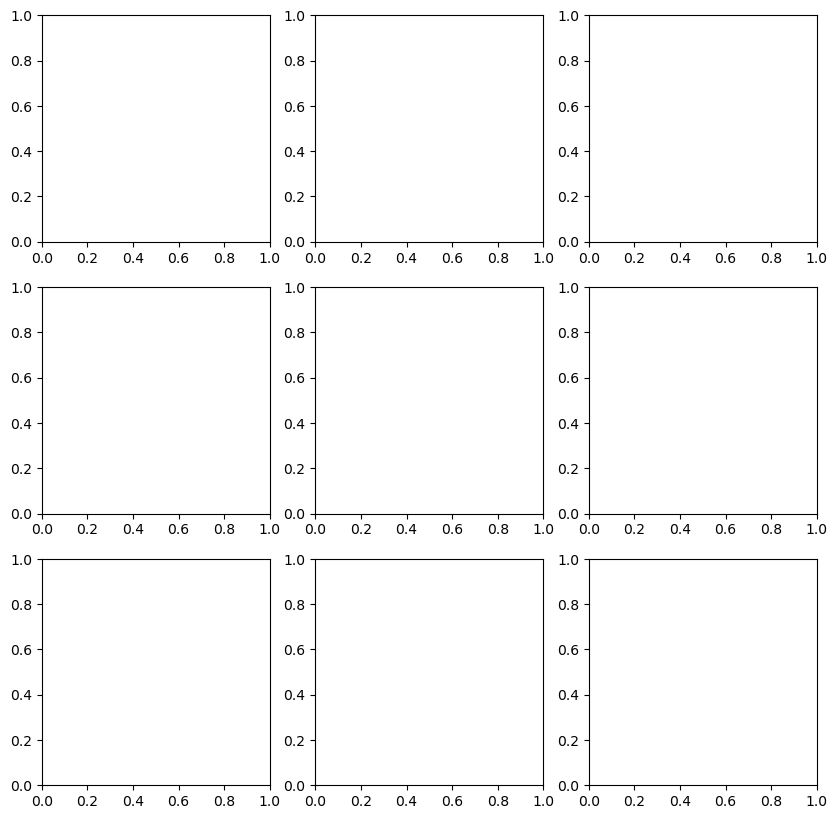

In [86]:
fig, axs = plt.subplots(nrows = 3,ncols = 3, figsize = (10,10))

<b>Method to access the subplots</b>

In [95]:
for i in range(0,len(sf_cols)):
    rows = i // 3
    cols = i % 3
    print(rows,cols)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


So, finally

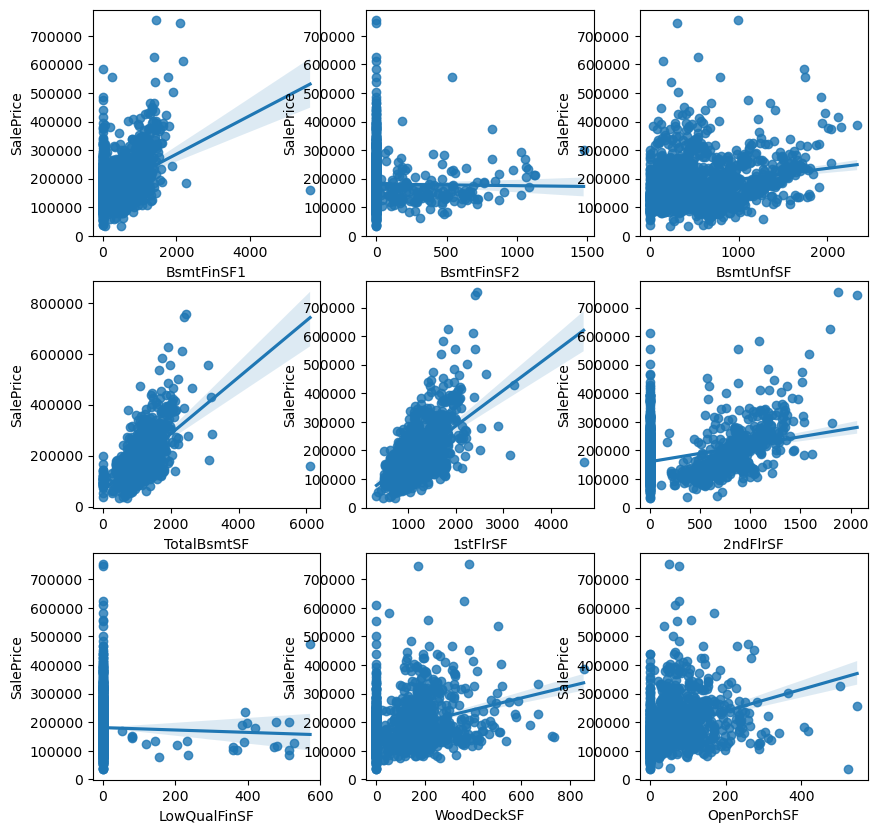

In [110]:
fig, axs = plt.subplots(nrows = 3,ncols = 3, figsize = (10,10))
for i in range(0,len(sf_cols)):
    rows = i // 3
    cols = i % 3
    ax = axs[rows, cols]
    plot = sns.regplot(x = sf_cols[i] , y = "SalePrice" , data = housing, ax = ax )

In [112]:
### Is the price of the house impacted by the Exterior covering on house
housing["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

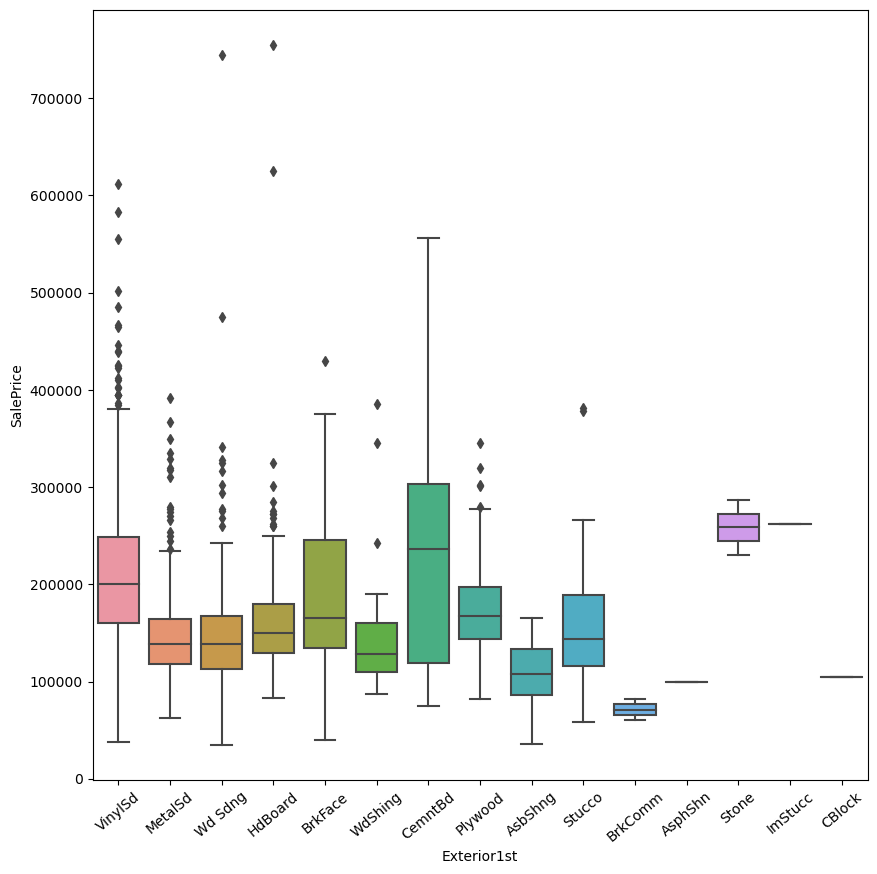

In [116]:
fig, axs = plt.subplots(figsize = (10,10))
plot = sns.boxplot(x = "Exterior1st", y = "SalePrice", data = housing, ax=axs);
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

<b>Q1. Rather than plotting the relationship between all the different types of Exterior, do the following:</b>

a) Create a new column - <i>"Exterior_New"</i> with only the top 3 values of Exterior in it. All other values are converted to "Others"

b) Plot the relationship between Sales price and this new columns

<b>Q2: Does the relationship between House exterior and Price change depending on how old the house is. For this question simply categorize houses into Old and New based on the condition: YearBuilt > 2000 "New" else "Old"</b>

<b> Q1. Rather than plotting the relationship between all the different types of Exterior, do the following:</b>

In [165]:
top_3_exterior = housing["Exterior1st"].value_counts().head(3)
top_3_exterior

VinylSd    515
HdBoard    222
MetalSd    220
Name: Exterior1st, dtype: int64

In [167]:
top_3_exterior = list(top_3_exterior.index)
top_3_exterior

['VinylSd', 'HdBoard', 'MetalSd']

In [171]:
housing["Exterior_new"] =  np.where(housing["Exterior1st"].isin(top_3_exterior) , housing["Exterior1st"], "Others")

In [173]:
housing["Exterior_new"].value_counts()

VinylSd    515
Others     503
HdBoard    222
MetalSd    220
Name: Exterior_new, dtype: int64

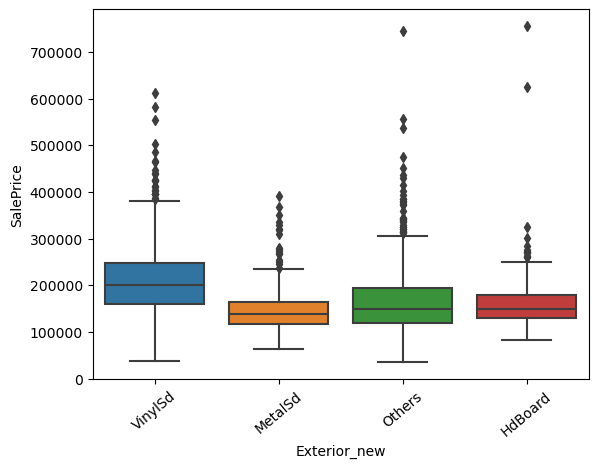

In [175]:
plot = sns.boxplot(x = "Exterior_new", y = "SalePrice", data = housing);
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

<b> Does the relationship between House exterior and Price change depending on how old the house is </b>

In [202]:
housing["New/Old"] = np.where(housing["YearBuilt"] > 2000, "New", "Old")

In [204]:
housing["New/Old"].value_counts()

Old    1096
New     364
Name: New/Old, dtype: int64

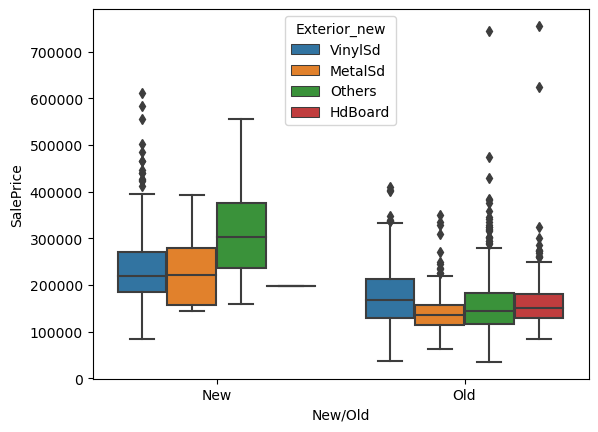

In [206]:
sns.boxplot(x = "New/Old", y = "SalePrice", hue = "Exterior_new", data = housing);

In [208]:
housing.groupby(["Exterior_new","New/Old"]).agg({"SalePrice":["Count", "median"]})

SalePrice          
                         count    median
Exterior_new New/Old                    
HdBoard      New             1  198500.0
             Old           221  149900.0
MetalSd      New            19  222000.0
             Old           201  135000.0
Others       New            35  303477.0
             Old           468  142976.5
VinylSd      New           309  219500.0
             Old           206  167075.0

<b> Has the type of exterior changed for newer homes compared to older houses </b>

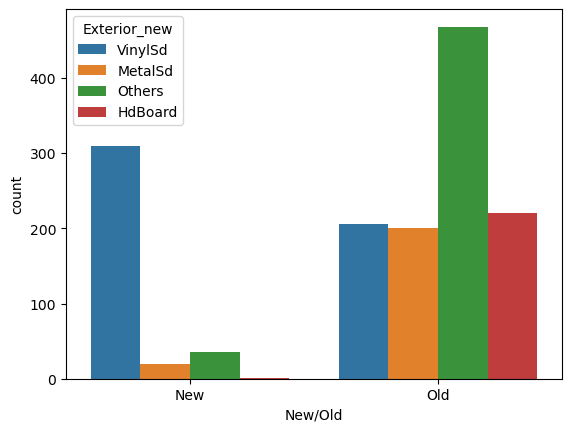

In [210]:
sns.countplot(x = "New/Old", data = housing, hue = "Exterior_new");